# Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib as mpl

from matplotlib.ticker import LogLocator, LogFormatterMathtext

# Exporting

In [2]:
from datetime import date

# My local path to the figure data - please replace with your own
figdata_path = os.getcwd() + '/figure-data/'
# My local path to where I am storing generated figures i.e. in the shared GDrive - please replace with your own
figdir = os.getcwd() + '/Output/' + date.today().strftime('%Y%m%d') + '/'
print(figdir)
print(figdata_path)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909/
/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/


# Figure Making

In [3]:
plt.rc('font', family='Arial')

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['figure.figsize'] = (4.0,3.0) # default = (6.0, 4.0)
mpl.rcParams['font.size']      = 14       # default = 10

mpl.rcParams['axes.linewidth']    = 0.75 # default = 1.0
mpl.rcParams['lines.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['patch.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['grid.linewidth']    = 0.5 # default = 0.5
mpl.rcParams['xtick.major.width'] = 0.75 # default = 0.5
mpl.rcParams['xtick.minor.width'] = 0.0 # default = 0.5
mpl.rcParams['ytick.major.width'] = 0.75 # default = 0.5
mpl.rcParams['ytick.minor.width'] = 0.0 # default = 0.5

def make_nice_axis(ax):
    """ Function to beautify axis"""
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.yaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

def save_figure(fig, fig_file):
    """
    Save the given figure object as PDF and PNG formats.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to be saved.
    fig_file (str): The file path (including the file name without extension) where the figure will be saved.

    Returns:
    None
    """
    os.makedirs(os.path.dirname(fig_file), exist_ok=True)
    fig.savefig(fname=fig_file + ".pdf", dpi=1200, format='pdf',bbox_inches='tight')
    fig.savefig(fname=fig_file + ".png", dpi=1200, format='png')

In [4]:
import matplotlib.colors as mcolors

# Species colors
node_pink = '#ef559f'
node_green = '#3ab261'
node_colors = [node_green, node_pink, '#efa873','#8bcbca']

decision_pink ='#f6accc'
decision_green = '#b0dbb8'

# Colorbar colors
cb_colors = ['#e7298a', '#34ac5c']
color1 = cb_colors[0] # Start color
color2 = cb_colors[1] # End color

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [color1, "white", color2])

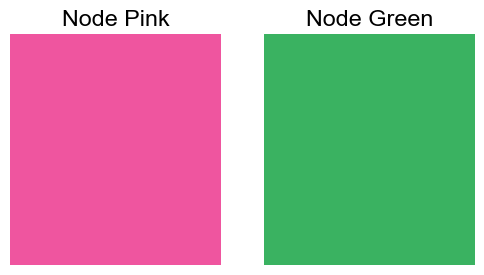

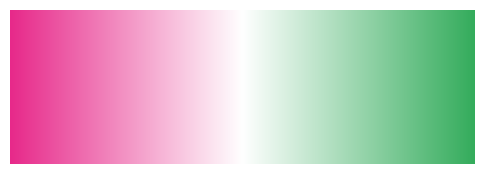

In [5]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Plot each color in a separate subplot
ax[0].add_patch(plt.Rectangle((0, 0), 1, 1, color=node_pink))
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].axis('off')
ax[0].set_title('Node Pink')

ax[1].add_patch(plt.Rectangle((0, 0), 1, 1, color=node_green))
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].axis('off')
ax[1].set_title('Node Green')

# Display the colors
plt.show()

# Create a gradient image to display the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
ax.set_axis_off()

plt.show()

# Plotting Supplementary Figures

## Supplementary Figure 1: Linear Boundary Extra Panels

In [6]:
figure = 'sup-fig-1'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-1/


### Panel A: Absolute Concentrations

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-1/linear_absolute-densities


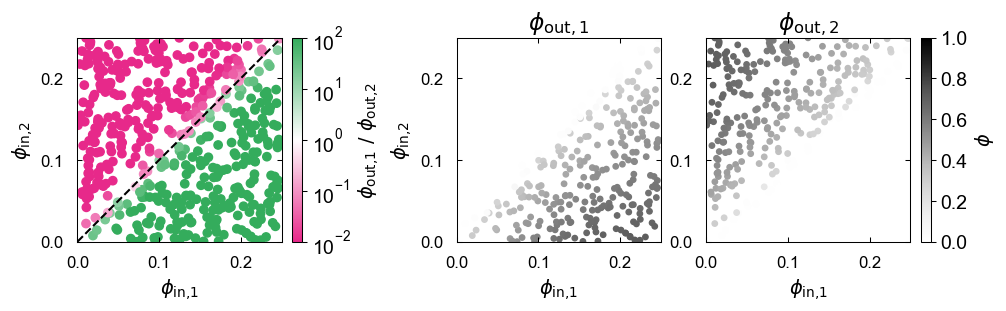

In [7]:
data = np.load(figfol + 'test_phis_final_linear_0hidden.npy')

fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='compressed')

for a in ax:
    make_nice_axis(a)
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_aspect(1)

ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
#ax[-1].set_yticks([])


# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

xvals=np.linspace(0,0.25,100)
ax[0].plot(xvals, xvals, ls='--', color='black',lw=1.5)
xvals=np.linspace(0.125 - 0.03, 0.125 + 0.03, 10)

ax[1].scatter(*data[:, :2].T, c=data[:, 2], cmap='Grays', s=15, vmin=0, vmax=1)
ax[1].set_title(r'$\phi_{\text{out},1}$')

sc = ax[2].scatter(*data[:, :2].T, c=data[:, 3], cmap='Grays', s=15, vmin=0, vmax=1)
cbar = plt.colorbar(sc, label=r'$\phi$')
ax[2].set_title(r'$\phi_{\text{out},2}$')

#plt.tight_layout()
fig_save = True
fig_name = 'linear_absolute-densities'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

### Panel B: dynamics of characteristic points

In [8]:
data_green = np.load(figfol + 'dynamics_data/linear_test_0p25-0p0.npy')
data_pink = np.load(figfol + 'dynamics_data/linear_test_0p0-0p25.npy')

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-1/modelA_dynamics_linear


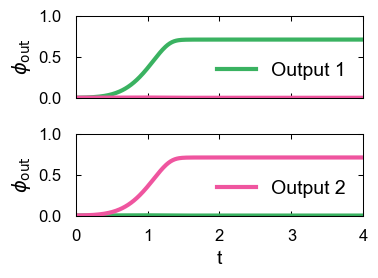

In [9]:
fig, ax = plt.subplots(2,1, figsize=(4,3), sharex=True)

make_nice_axis(ax[0])

ax[0].plot(data_green[:,0], data_green[:,1], color=node_colors[0], lw=3, label='Output 1')
ax[0].plot(data_green[:,0], data_green[:,2], color=node_colors[1], lw=3)
ax[0].set_ylim(0,1)
ax[0].legend(frameon=False)
# ax[0].set_title(r'$\vec{\phi}_\text{in}=(0.25, 0)$', fontsize=12, x=0.05, y=0.85, ha="left", va="top")

#ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$\phi_\text{out}$')
# Hide x-tick labels on the top subplot
ax[0].tick_params(labelbottom=False)

make_nice_axis(ax[1])
ax[1].plot(data_pink[:,0], data_pink[:,1], color=node_colors[0], lw=3)
ax[1].plot(data_pink[:,0], data_pink[:,2], color=node_colors[1], lw=3, label='Output 2')
ax[1].set_xlim(0,4)
ax[1].set_ylim(0,1)
ax[1].legend(frameon=False)
# ax[1].set_title(r'$\vec{\phi}_\text{in}=(0, 0.25)$', fontsize=12, x=0.05, y=0.85, ha="left", va="top")

ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$\phi_\text{out}$')

plt.tight_layout()
fig_save = True
fig_name = 'modelA_dynamics_linear'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

### Temperature Scan

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-1/linear_temp-scan


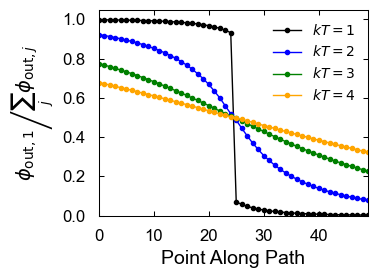

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
make_nice_axis(ax)

colors = ['black', 'blue', 'green', 'orange', 'red']

for i in range(1,5):
    phi_out = np.load(figfol+f'temp-scan/linear_temperature_phi_out_along_path_{i}.npy')
    ax.plot(np.arange(len(phi_out)), phi_out[:,1]/np.sum(phi_out[:,:2], axis=1), '.-', label=fr'$kT={i}$', color=colors[i-1])

ax.set_xlim(0,49)
ax.set_ylim(0,)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Point Along Path')
ax.set_ylabel(r'$\phi_{\text{out},1}\left/\sum_j \phi_{\text{out},j}\right.$')

plt.tight_layout()
fig_save = True
fig_name = 'linear_temp-scan'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

## Supplementary Figure 2: Theory Boundaries

In [11]:
figure = 'sup-fig-2'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-2/


/var/folders/tn/6dvdxfx54kq8rf4qqzs3yscm0000gp/T/ipykernel_40122/90346747.py:169: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(-mu + chi[4,0] * phi1 + chi[4,1] * phi2 +


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-2/theory_curves


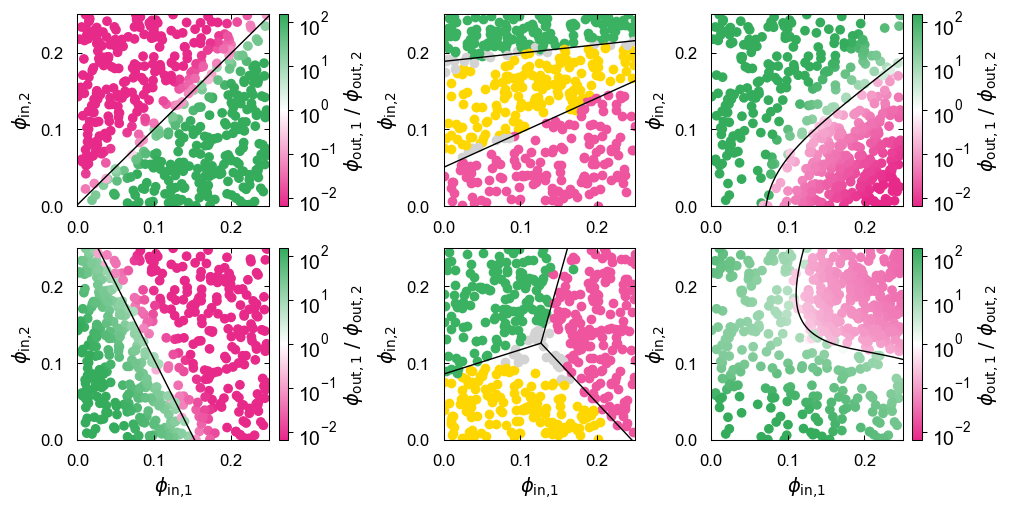

In [12]:
fig, ax = plt.subplots(2,3, figsize=(10,6), layout = 'compressed', sharex=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_ylabel(r'$\phi_\text{in,2}$')
    a.set_xlim(0, 0.25)
    a.set_ylim(0, 0.25)
    a.set_yticks([0,0.1,0.2])
    a.set_aspect(1)
#ax[0].set_xticks([])

for a in ax[1]:
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')

# Use LogNorm for logarithmic color scale
scale = 1e-2/1.5
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

#---------- 2-2-0 ----------#

# Panel 1: positive slope

data = np.load(figfol+f'linear1/test_phis_final_linear_0hidden.npy')
chi_mat = np.load(figfol+f'linear1/chi_matrix_linear_0hidden.npy')
mu_res = np.load(figfol+f'linear1/mu_reservoir_linear_0hidden.npy')

sc = ax[0][0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_{\text{out},1}\ /\ \phi_{\text{out},2}$')
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

dmu = mu_res[0] - mu_res[1]
A = chi_mat[2,0] - chi_mat[3,0]
B = chi_mat[2,1] - chi_mat[3,1]
phi_1 = np.linspace(0,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1
ax[0][0].plot(phi_1, phi_2, color='black')
#ax[0][0].set_title('2-2-0')

# Panel 2: negative slope

data = np.load(figfol+f'linear2/test_phis_final_linear_0hidden.npy')
chi_mat = np.load(figfol+f'linear2/chi_matrix_linear_0hidden.npy')
mu_res = np.load(figfol+f'linear2/mu_reservoir_linear_0hidden.npy')

sc = ax[1][0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_{\text{out},1}\ /\ \phi_{\text{out},2}$')
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

dmu = mu_res[0] - mu_res[1]
A = chi_mat[2,0] - chi_mat[3,0]
B = chi_mat[2,1] - chi_mat[3,1]
phi_1 = np.linspace(0,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1
ax[1][0].plot(phi_1, phi_2, color='black')

#---------- 2-3-0 ----------#

colors = ['#3ab261', 'gold', '#ef559f']

# Panel 1: positive slope

data = np.load(figfol+f'linear-3class/test_phis_final_linear-3class_0hidden.npy')
chi_mat = np.load(figfol+f'linear-3class/chi_matrix_linear-3class_0hidden.npy')
mu_res = np.load(figfol+f'linear-3class/mu_reservoir_linear-3class_0hidden.npy')

c_array = []
for i in range(len(data)):
    idx = np.argmax(data[i, 2:])
    if data[i, 2+idx]>1.1/5 and data[i, 2+np.mod(idx+1, 3)]<0.25/5 and data[i, 2+np.mod(idx+2, 3)]<0.25/5:
        c_array.append(colors[idx])
    else:
        c_array.append('lightgray')

# Line 1

dmu = mu_res[0] - mu_res[1]
A = chi_mat[2,0] - chi_mat[3,0]
B = chi_mat[2,1] - chi_mat[3,1]

phi_1 = np.linspace(0,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1

ax[0][1].plot(phi_1, phi_2, color='black')
#ax[0][1].set_title('2-3-0')

# Line 2

dmu = mu_res[1] - mu_res[2]
A = chi_mat[3,0] - chi_mat[4,0]
B = chi_mat[3,1] - chi_mat[4,1]

phi_1 = np.linspace(0,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1

ax[0][1].plot(phi_1, phi_2, color='black')

# Scatter Data

for i in range(len(data)):
    ax[0][1].scatter(*data[i, :2].T, color=c_array[i])

data = np.load(figfol+f'triangle/test_phis_final_triangle_0hidden.npy')
chi_mat = np.load(figfol+f'triangle/chi_matrix_triangle_0hidden.npy')
mu_res = np.load(figfol+f'triangle/mu_reservoir_triangle_0hidden.npy')

c_array = []
for i in range(len(data)):
    idx = np.argmax(data[i, 2:])
    if data[i, 2+idx]>1.1/5 and data[i, 2+np.mod(idx+1, 3)]<0.25/5 and data[i, 2+np.mod(idx+2, 3)]<0.25/5:
        c_array.append(colors[idx])
    else:
        c_array.append('lightgray')

# Line 1:

dmu = mu_res[0] - mu_res[1]
A = chi_mat[2,0] - chi_mat[3,0]
B = chi_mat[2,1] - chi_mat[3,1]

phi_1 = np.linspace(0,0.127,10)
phi_2 = (dmu/B)-(A/B)*phi_1

ax[1][1].plot(phi_1, phi_2, color='black')

# Line 2:

dmu = mu_res[1] - mu_res[2]
A = chi_mat[3,0] - chi_mat[4,0]
B = chi_mat[3,1] - chi_mat[4,1]

phi_1 = np.linspace(0.127,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1

ax[1][1].plot(phi_1, phi_2, color='black')

# Line 3:

dmu = mu_res[0] - mu_res[2]
A = chi_mat[2,0] - chi_mat[4,0]
B = chi_mat[2,1] - chi_mat[4,1]

phi_1 = np.linspace(0.127,0.25,10)
phi_2 = (dmu/B)-(A/B)*phi_1

ax[1][1].plot(phi_1, phi_2, color='black')

# Scatter Data:

for i in range(len(data)):
    ax[1][1].scatter(*data[i, :2].T, color=c_array[i])

#---------- 2-2-1 ----------#

from scipy.optimize import root_scalar

#fig, ax = plt.subplots(2,1, figsize=(3,6), layout = 'compressed', sharex=True)

# Use LogNorm for logarithmic color scale
scale = 1e-2/1.5
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

# Panel 1: Weak Curve

def fn_y(phi2, phi1, chi, mu, phi_out):
    term1 = (chi[2,0] - chi[3,0]) * phi1
    term2 = (chi[2,1] - chi[3,1]) * phi2
    numerator = (chi[2,4] - chi[3,4]) * (1 - phi1 - phi2 - 2 * phi_out)
    exp_term = np.exp(-mu + chi[4,0] * phi1 + chi[4,1] * phi2 +
                      (chi[4,2] + chi[4,3]) * phi_out)
    denominator = 1 + exp_term
    return term1 + term2 + numerator / denominator

def generate_data_from_x(chi, mu, phi_out=0., x0=0.125):
    x_values = np.arange(0., 0.251, 0.001)
    y_values = np.zeros(len(x_values))

    for i in range(len(x_values)):
        sol = root_scalar(fn_y, args=(x_values[i], chi, mu[-1], phi_out), x0=x0, x1=x0-0.05, method='secant')
        if sol.converged==True:
            y_values[i]=sol.root
        else:
            y_values[i]=y_values[i-1]

    return x_values, y_values

data = np.load(figfol+f'weak-curve/test_phis_final_weak-curve_1hidden.npy')
chi_mat = np.load(figfol+f'weak-curve/chi_matrix_weak-curve_1hidden.npy')
mu_res = np.load(figfol+f'weak-curve/mu_reservoir_weak-curve_1hidden.npy')

sc = ax[0][2].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_{\text{out},1}\ /\ \phi_{\text{out},2}$')
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])
x_vals, y_vals = generate_data_from_x(chi_mat, mu_res, phi_out=(1.1+0.25)/10)
ax[0][2].plot(x_vals, y_vals, color='black')#, label=r'$\phi_o=0.11$')
#ax[0][2].set_title('2-2-1')

# Panel 2: Strong Curve

def fn_x(phi1, phi2, chi, mu, phi_out):
    term1 = (chi[2,0] - chi[3,0]) * phi1
    term2 = (chi[2,1] - chi[3,1]) * phi2
    numerator = (chi[2,4] - chi[3,4]) * (1 - phi1 - phi2 - 2 * phi_out)
    exp_term = np.exp(-mu + chi[4,0] * phi1 + chi[4,1] * phi2 +
                      (chi[4,2] + chi[4,3]) * phi_out)
    denominator = 1 + exp_term
    return term1 + term2 + numerator / denominator

def generate_data_from_y(chi, mu, phi_out=0., x0=0.125):
    y_values = np.arange(0.1, 0.251, 0.001)
    x_values = np.zeros(len(y_values))

    for i in range(len(y_values)):
        sol = root_scalar(fn_x, args=(y_values[i], chi, mu[-1], phi_out), x0=x0, x1=x0-0.05, method='secant')
        if sol.converged==True:
            x_values[i]=sol.root
        else:
            x_values[i]=y_values[i-1]

    return x_values, y_values

data = np.load(figfol+f'strong-curve/test_phis_final_strong-curve_1hidden.npy')
chi_mat = np.load(figfol+f'strong-curve/chi_matrix_strong-curve_1hidden.npy')
mu_res = np.load(figfol+f'strong-curve/mu_reservoir_strong-curve_1hidden.npy')

sc = ax[1][2].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_{\text{out},1}\ /\ \phi_{\text{out},2}$')
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])
x_vals, y_vals = generate_data_from_y(chi_mat, mu_res, phi_out=(1.1+0.25)/10)
ax[1][2].plot(x_vals, y_vals, color='black')#, label=r'$\phi_o=0.11$')

# Export Figure

fig_save = True
fig_name = f'theory_curves'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)

plt.show()

## Supplementary Figure 4: Complex Decision Boundaries

In [13]:
figure = 'sup-fig-4'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-4/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-4/and_0hidden


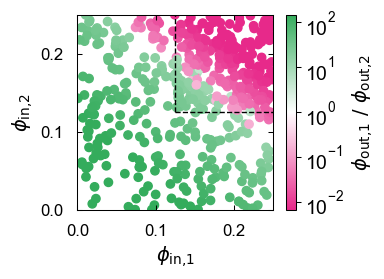

In [14]:
data = np.load(figfol + 'test_phis_final_and_0hidden.npy')

fig, ax = plt.subplots(1, 1, figsize=(4,3))
make_nice_axis(ax)

# Use LogNorm for logarithmic color scale
scale = 1e-2/1.5
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

sc = ax.scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax.axhline(0.125, xmin=0.5, ls='--', color='black')
ax.axvline(0.125, ymin=0.5, ls='--', color='black')
ax.set_xlabel(r'$\phi_\text{in,1}$')
ax.set_ylabel(r'$\phi_\text{in,2}$')
ax.set_xlim(0,0.25)
ax.set_ylim(0,0.25)
ax.set_xticks([0,0.1,0.2])
ax.set_yticks([0,0.1,0.2])
ax.set_aspect(1)

plt.tight_layout()
fig_save = True
fig_name = 'and_0hidden'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-4/and_2hidden


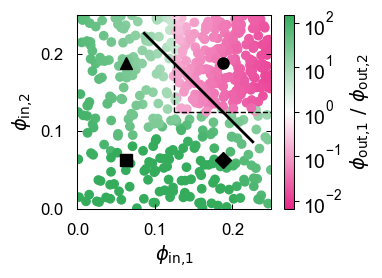

In [15]:
data = np.load(figfol + 'test_phis_final_and_2hidden.npy')

fig, ax = plt.subplots(1, 1, figsize=(4,3))
make_nice_axis(ax)

# Use LogNorm for logarithmic color scale
scale = 1e-2/1.5
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

sc = ax.scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)# s=15)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax.axhline(0.125, xmin=0.5, ls='--', color='black')
ax.axvline(0.125, ymin=0.5, ls='--', color='black')

max_input = 0.25
#tvals = np.linspace(-0.03, 0.03, 50)
#xvals = 3*max_input/4 + tvals
#yvals = 5*max_input/4 - xvals
#plt.plot(xvals, yvals, color='black', linewidth=2)

tvals = np.linspace(-0.07, 0.07, 50)
xvals = 5*max_input/8 + tvals
yvals = 5*max_input/4 - xvals
ax.plot(xvals, yvals, color='black', linewidth=2)

ax.plot(0.0625, 0.0625, 's', color='black', markersize=8)
ax.plot(0.0625, 0.1875, '^', color='black', markersize=8)
ax.plot(0.1875, 0.1875, 'o', color='black', markersize=8)
ax.plot(0.1875, 0.0625, 'D', color='black', markersize=8)

ax.set_xlabel(r'$\phi_\text{in,1}$')
ax.set_ylabel(r'$\phi_\text{in,2}$')
ax.set_xlim(0,0.25)
ax.set_ylim(0,0.25)
ax.set_xticks([0,0.1,0.2])
ax.set_yticks([0,0.1,0.2])
ax.set_aspect(1)

plt.tight_layout()
fig_save = True
fig_name = 'and_2hidden'

fig.tight_layout()

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-4/and_temp-scan


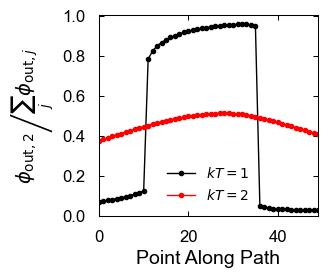

In [16]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))
make_nice_axis(ax)

colors = ['black', 'red']

for i in range(1,3):
    phi_out = np.load(figfol+f'temp-scan/and_temperature_phi_out_along_path_{i}.npy')
    ax.plot(np.arange(len(phi_out)), phi_out[:,1]/np.sum(phi_out[:,:2], axis=1), '.-', label=fr'$kT={i}$', color=colors[i-1])

ax.set_xlim(0,49)
ax.set_ylim(0,)
ax.legend(frameon=False, fontsize=10)#, loc = 'lower right')
ax.set_xlabel('Point Along Path')
ax.set_ylabel(r'$\phi_{\text{out},2}\left/\sum_j \phi_{\text{out},j}\right.$')

plt.tight_layout()
fig_save = True
fig_name = 'and_temp-scan'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-4/model_A_AND_dynamics


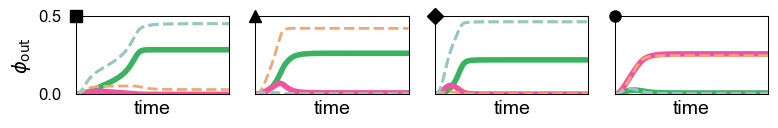

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(8, 1.5), sharey=True)

for a in ax:
    make_nice_axis(a)
    a.set_yticks([0,0.5])

strings = ['0p0625-0p0625', '0p0625-0p1875', '0p1875-0p0625', '0p1875-0p1875']
titles = ['(lo, lo)', '(lo, hi)', '(hi, lo)', '(hi, hi)']
ys = [-0.02, -0.03, -0.07, -0.05]

for i in range(4):
    data = np.load(figfol + 'dynamics_data/and_test_'+strings[i]+'.npy')
    ax[i].plot(data[:,0], data[:,1], color=node_colors[0], lw=4)
    ax[i].plot(data[:,0], data[:,2], color=node_colors[1], lw=4)
    ax[i].plot(data[:,0], data[:,3:], color=node_colors[2], lw=2, linestyle='--')
    ax[i].plot(data[:,0], data[:,4:], color=node_colors[3], lw=2, linestyle='--')
    ax[i].set_xlim(0, 25)
    ax[i].set_ylim(0, 0.5)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xticks([])
    ax[i].set_yticks([0,0.5])
    ax[i].set_xlabel("time")

ax[0].set_ylabel(r"$\phi_{\text{out}}$")

ax[0].plot(0., 0.5, 's', color='black', markersize=8, clip_on=False, zorder=3)
ax[1].plot(0., 0.5, '^', color='black', markersize=8, clip_on=False, zorder=3)
ax[2].plot(0., 0.5, 'D', color='black', markersize=8, clip_on=False, zorder=3)
ax[3].plot(0., 0.5, 'o', color='black', markersize=8, clip_on=False, zorder=3)

fig.tight_layout()

# Save the figure if desired
fig_save = True
fig_name = 'model_A_AND_dynamics'
if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)

plt.show()

## Supplementary Figure 5: Line Scans for Other Boundaries

In [18]:
figure = 'sup-fig-5'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-5/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-5/line_scans


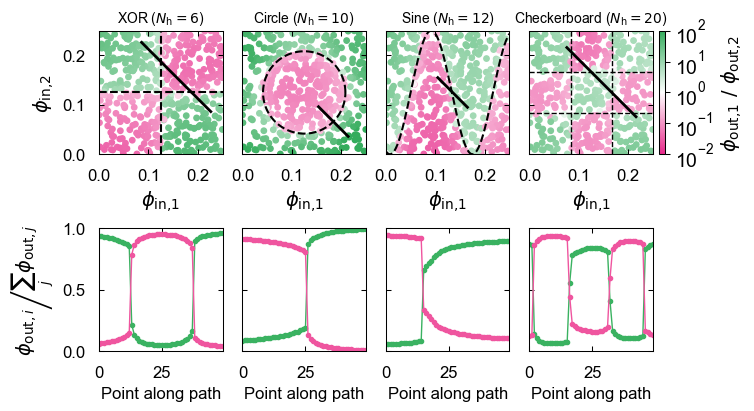

In [19]:
#---------- Line Graphics -----------#

# Use LogNorm for logarithmic color scale
max_input=0.25

scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

fig, (ax, ax2) = plt.subplots(2,4, figsize=(10,4), layout='compressed', sharey='row')#, height_ratios=[3,2])

for a in ax:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

btypes = ['xor', 'circle', 'sine', 'checkerboard']
nh_list = [6, 10, 12, 20]

for n in range(len(btypes)):
    boundary_type = btypes[n]
    n_hidden = nh_list[n]
    
    data = np.load(figfol + f'{boundary_type}/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')

    sc = ax[n].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm,s=15)

# XOR

ax[0].axhline(0.125, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ls='--', color='black',lw=1.5)

tvals = np.linspace(-0.07, 0.07, 50)
xvals = 5*max_input/8 + tvals
yvals = 5*max_input/4 - xvals
ax[0].plot(xvals, yvals, color='black', linewidth=2)
ax[0].set_title(r'XOR ($N_\text{h}=6$)', fontsize=10)

# Circle

r=0.25/3
theta_vals=np.linspace(0,2*np.pi,100)
ax[1].plot(max_input/2 + r*np.cos(theta_vals), max_input/2 + r*np.sin(theta_vals), ls='--', color='black',lw=1.5)

tvals = np.linspace(-0.03, 0.03, 50)
r = max_input/3 * np.ones(50)
xvals = max_input/2 + r*np.cos(-np.pi/4) + tvals
yvals = max_input/2 + r*np.sin(-np.pi/4) - tvals
ax[1].plot(xvals, yvals, color='black', linewidth=2)
ax[1].set_title(r'Circle ($N_\text{h}=10$)', fontsize=10)

# Sine

xvals=np.linspace(0,max_input,500)
sine_boundary = (max_input / 2) * (1 + np.sin((3 / 2) * 2 * np.pi * (xvals / max_input - 0.2)))
ax[2].plot(xvals, sine_boundary, 'k--',lw=1.5)

tvals = np.linspace(-0.03, 0.03, 50)
xvals = 0.01 + max_input/2 + tvals
yvals = max_input/2 - tvals
ax[2].plot(xvals, yvals, color='black', linewidth=2)
ax[2].set_title(r'Sine ($N_\text{h}=12$)', fontsize=10)

# Checkerboard

ax[3].axvline(max_input/3, ls='--', color='black')
ax[3].axvline(2*max_input/3, ls='--', color='black')
ax[3].axhline(max_input/3, ls='--', color='black')
ax[3].axhline(2*max_input/3, ls='--', color='black')

max_input = 0.25
tvals = np.linspace(-0.07, 0.07, 50)
xvals = 7*max_input/12 + tvals
yvals = 7*max_input/6 - xvals
ax[3].plot(xvals, yvals, color='black', linewidth=2)

cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])
ax[3].set_title(r'Checkerboard ($N_\text{h}=20$)', fontsize=10)

#---------- Line Scans ----------#

for a in ax2:
    make_nice_axis(a)
    a.set_xlim(0,49)
    a.set_ylim(0,1)
    a.set_xlabel('Point along path', fontsize=12)
ax2[0].set_ylabel(r'$\phi_{\text{out},i}\left/\sum_j \phi_{\text{out},j}\right.$')

btypes = ['xor', 'circle', 'sine', 'checkerboard']

for n in range(len(btypes)):
    boundary_type = btypes[n]
    n_hidden = nh_list[n]

    for i in range(2):
        phi_out = np.load(figfol+f'{boundary_type}/temp-scan/{boundary_type}_temperature_phi_out_along_path_1.npy')
        ax2[n].plot(np.arange(len(phi_out)), phi_out[:,i]/np.sum(phi_out[:,:2], axis=1), '.-', color=node_colors[i])

fig_save = True
fig_name = 'line_scans'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

# Supplementary 6: Dynamics Comparison

In [20]:
figure = 'sup-fig-6'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-6/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/linear_dynamics_comparison


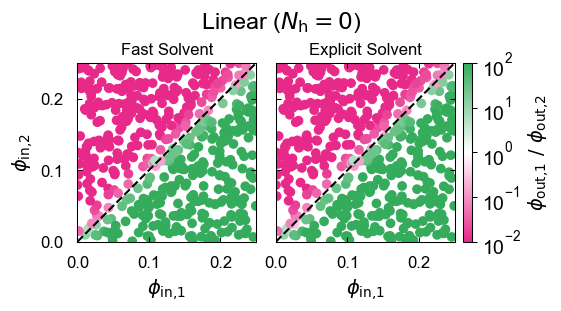

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/and_dynamics_comparison


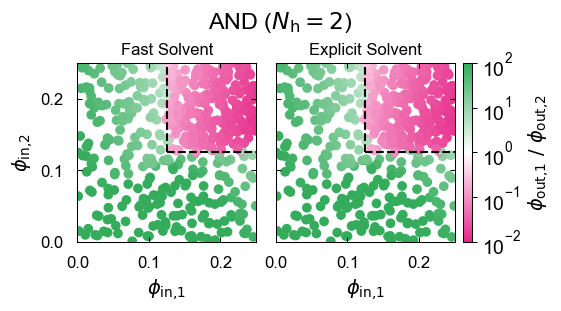

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/xor_dynamics_comparison


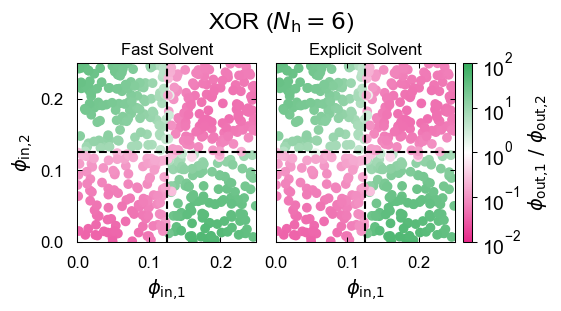

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/circle_dynamics_comparison


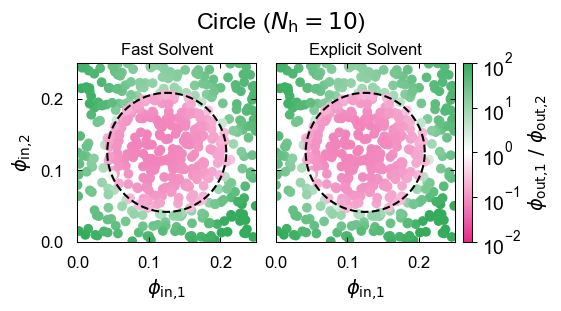

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/sine_dynamics_comparison


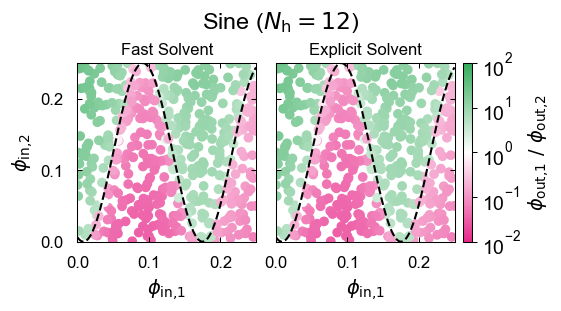

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-6/checkerboard_dynamics_comparison


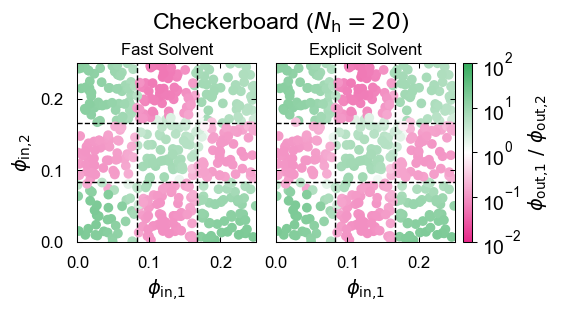

In [21]:
# Use LogNorm for logarithmic color scale
max_input=0.25

scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

#---------- Linear ----------#

data = np.load(figfol + 'linear/0_hidden/fast/test_phis_final_linear_0hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
xvals=np.linspace(0,0.25,100)
ax[0].plot(xvals, xvals, ls='--', color='black',lw=1.5)

data = np.load(figfol + 'linear/0_hidden/explicit/test_phis_final_linear_0hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].plot(xvals, xvals, ls='--', color='black',lw=1.5)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'Linear ($N_\text{h}=0$)')#, fontsize=10)

fig_save = True
fig_name = 'linear_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

#----------- AND -----------#

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

data = np.load(figfol+'and/2_hidden/fast/test_phis_final_and_2hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
ax[0].axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)

data = np.load(figfol+'and/2_hidden/explicit/test_phis_final_and_2hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax[1].axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'AND ($N_\text{h}=2$)')#, fontsize=10)

fig_save = True
fig_name = 'and_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

#---------- XOR ----------#

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

data = np.load(figfol+'xor/6_hidden/fast/test_phis_final_xor_6hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
ax[0].axhline(0.125, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ls='--', color='black',lw=1.5)

data = np.load(figfol+'xor/6_hidden/explicit/test_phis_final_xor_6hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].axhline(0.125, ls='--', color='black',lw=1.5)
ax[1].axvline(0.125, ls='--', color='black',lw=1.5)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'XOR ($N_\text{h}=6$)')#, fontsize=10)

fig_save = True
fig_name = 'xor_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

#---------- Circle ----------#

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

data = np.load(figfol+'circle/10_hidden/fast/test_phis_final_circle_10hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
r=0.25/3
theta_vals=np.linspace(0,2*np.pi,100)
ax[0].plot(max_input/2 + r*np.cos(theta_vals), max_input/2 + r*np.sin(theta_vals), ls='--', color='black',lw=1.5)

data = np.load(figfol+'circle/10_hidden/explicit/test_phis_final_circle_10hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].plot(max_input/2 + r*np.cos(theta_vals), max_input/2 + r*np.sin(theta_vals), ls='--', color='black',lw=1.5)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'Circle ($N_\text{h}=10$)')#, fontsize=10)

fig_save = True
fig_name = 'circle_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

#---------- Sine -----------#

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

data = np.load(figfol+'sine/12_hidden/fast/test_phis_final_sine_12hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
xvals=np.linspace(0,max_input,500)
sine_boundary = (max_input / 2) * (1 + np.sin((3 / 2) * 2 * np.pi * (xvals / max_input - 0.2)))
ax[0].plot(xvals, sine_boundary, 'k--',lw=1.5)

data = np.load(figfol+'sine/12_hidden/explicit/test_phis_final_sine_12hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].plot(xvals, sine_boundary, 'k--',lw=1.5)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'Sine ($N_\text{h}=12$)')#, fontsize=10)

fig_save = True
fig_name = 'sine_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

#---------- Checkerboard ----------#

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='compressed', sharex=True, sharey=True)

for a in ax.reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

data = np.load(figfol+'checkerboard/20_hidden/fast/test_phis_final_checkerboard_20hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].set_title('Fast Solvent', fontsize=12)
ax[0].axvline(max_input/3, ls='--', color='black')
ax[0].axvline(2*max_input/3, ls='--', color='black')
ax[0].axhline(max_input/3, ls='--', color='black')
ax[0].axhline(2*max_input/3, ls='--', color='black')

data = np.load(figfol+'checkerboard/20_hidden/explicit/test_phis_final_checkerboard_20hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[1].set_title('Explicit Solvent', fontsize=12)
ax[1].axvline(max_input/3, ls='--', color='black')
ax[1].axvline(2*max_input/3, ls='--', color='black')
ax[1].axhline(max_input/3, ls='--', color='black')
ax[1].axhline(2*max_input/3, ls='--', color='black')
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

fig.suptitle(r'Checkerboard ($N_\text{h}=20$)')#, fontsize=10)

fig_save = True
fig_name = 'checkerboard_dynamics_comparison'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

# Supplementary 7: Trained Parameters

In [22]:
figure = 'sup-fig-7'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-7/


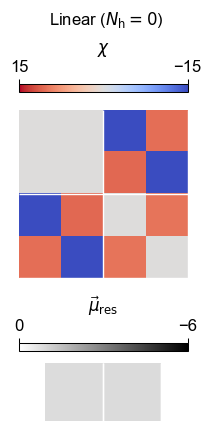

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/linear_parameters


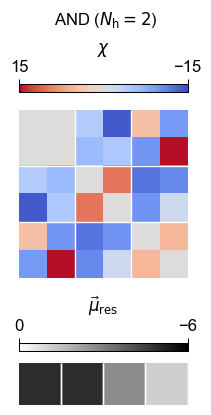

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/and_parameters


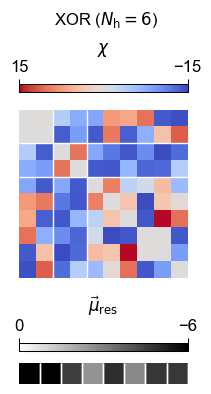

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/xor_parameters


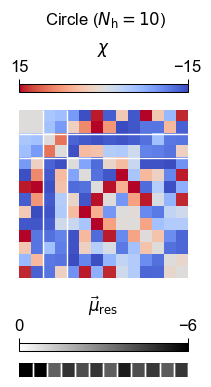

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/circle_parameters


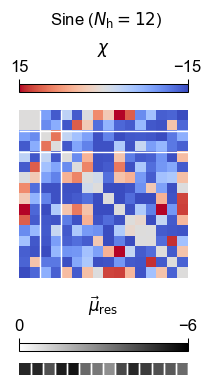

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/sine_parameters


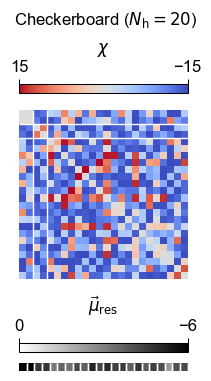

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-7/checkerboard_parameters


In [23]:
def make_chi_panel(data, ax):

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    # Plot the data using imshow, transposed for horizontal orientation
    im = ax.imshow(data, cmap='coolwarm', vmin=-15, vmax=15)#, extent=[-0.5, 8.5, -0.5, 0.5])

    # Add a horizontal colorbar on top
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', fraction=0.6, pad=0.1, location='top')
    cbar.set_ticks([-15, 15])  # Set colorbar ticks in reverse order
    cbar.ax.tick_params(labelsize=12)  # Increase font size of tick labels
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    cbar.set_label(r'$\chi$', fontsize=12, labelpad=5)
    
    ax.hlines(1.5, xmin=-1/2, xmax=len(data)-0.5, colors='white', linewidth=1, zorder=1)
    ax.hlines(3.5, xmin=-1/2, xmax=len(data)-0.5, colors='white', linewidth=1, zorder=1)
    ax.vlines(1.5, ymin=-1/2, ymax=len(data)-0.5, colors='white', linewidth=1, zorder=1)
    ax.vlines(3.5, ymin=-1/2, ymax=len(data)-0.5, colors='white', linewidth=1, zorder=1)

def make_mu_panel(data, ax):

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    # Plot the data using imshow, transposed for horizontal orientation
    im = ax.imshow(np.array(data).reshape(1, -1), cmap='gray', vmin=-6, vmax=0)#, extent=[-0.5, 8.5, -0.5, 0.5])

    # Add a horizontal colorbar on top
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', fraction=0.6, pad=0.2, location='top')
    cbar.set_ticks([0, -6])  # Set colorbar ticks in reverse order
    cbar.ax.tick_params(labelsize=12)  # Increase font size of tick labels
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    cbar.set_label(r'$\vec{\mu}_\text{res}$', fontsize=12, labelpad=5)
    # Add vertical line between the nodes
    for mid_y in np.arange(0.5,len(data)+0.5):
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)

btypes = ['linear', 'and', 'xor', 'circle', 'sine', 'checkerboard']
nh_list = [0, 2, 6, 10, 12, 20]

titles = [f'Linear ('+r'$N_\text{h}=0$)',
          f'AND ('+r'$N_\text{h}=2$)',
          f'XOR ('+r'$N_\text{h}=6$)',
          f'Circle ('+r'$N_\text{h}=10$)',
          f'Sine ('+r'$N_\text{h}=12$)',
          f'Checkerboard ('+r'$N_\text{h}=20$)'
          ]

for i in range(len(btypes)):
    boundary_type = btypes[i]
    n_hidden = nh_list[i]

    chi_mat = np.load(figfol + f'{boundary_type}_data/chi_matrix_{boundary_type}_{n_hidden}hidden.npy')
    mu_res = np.load(figfol + f'{boundary_type}_data/mu_reservoir_{boundary_type}_{n_hidden}hidden.npy')

    fig, ax = plt.subplots(2, 1, figsize=(2,4.2), layout='constrained', height_ratios=[3,1])

    make_chi_panel(chi_mat, ax[0])
    make_mu_panel(mu_res, ax[1])
    fig.suptitle(titles[i], fontsize=12)

    plt.show()

    fig_save = True
    fig_name = boundary_type + '_parameters'

    if fig_save:
        print(figdir+ '/' + figure + '/' +fig_name)
        save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
    plt.show()

## Supplementary Figure 8-12: Hidden Phase Compositions

In [24]:
from scipy import cluster

figure = 'sup-fig-8-12'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-8-12/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-8-12/and_breakdown


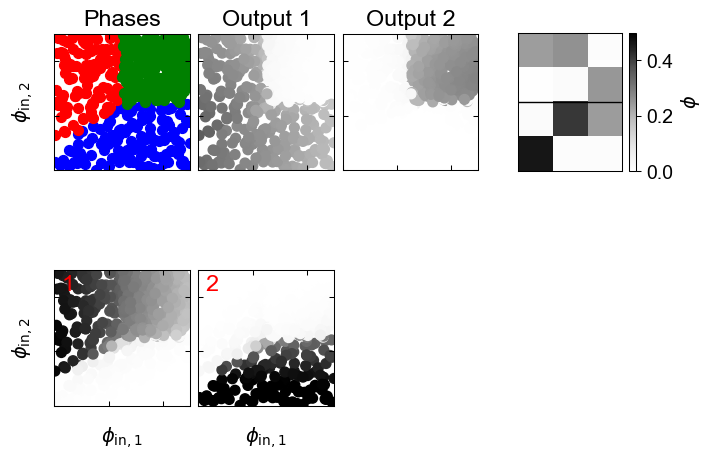

In [25]:
boundary_type = "and"
n_hidden = 2

data = np.load(figfol+f'{boundary_type}_data/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')
phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

fig, ax = plt.subplots(3, 4, figsize=(7,4.5), constrained_layout=True, height_ratios=[1,0.5,1])

for a in ax[0,:3]:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[2:].reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[-1]:
    a.set_xticks([0, 0.1, 0.2])
    a.set_xlabel(r'$\phi_{\text{in},1}$')

for a in (ax.T)[0]:
    a.set_yticks([0, 0.1, 0.2])
    a.set_ylabel(r'$\phi_{\text{in},2}$')

for a in ax[1]:
    a.set_visible(False)

colors = ['blue', 'red', 'green', 'orange']

for i in range(len(phases)):
    ax[0][0].scatter(*data[data_indices==i+1][:,:2].T, s=50, color=colors[i])
ax[0][0].set_title('Phases')

ax[0][1].scatter(*data[:,:2].T, c=data[:, 2], cmap='Grays', s=50, vmin=0, vmax=0.5)
ax[0][1].set_title('Output 1')

sc = ax[0][2].scatter(*data[:,:2].T, c=data[:, 3], cmap='Grays', s=50, vmin=0, vmax=0.5)
ax[0][2].set_title('Output 2')

phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

im=ax[0,3].imshow(phases.T, cmap='Grays', vmin=0, vmax=0.5)
ax[0,3].axhline(1.5, color='black')
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
plt.colorbar(im, label=r'$\phi$')

i=2
for j in range(2):

    sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=0.5)
    ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')

ax[i][2].set_visible(False)
ax[i][3].set_visible(False)

fig_save = True
fig_name = f'{boundary_type}_breakdown'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-8-12/xor_breakdown


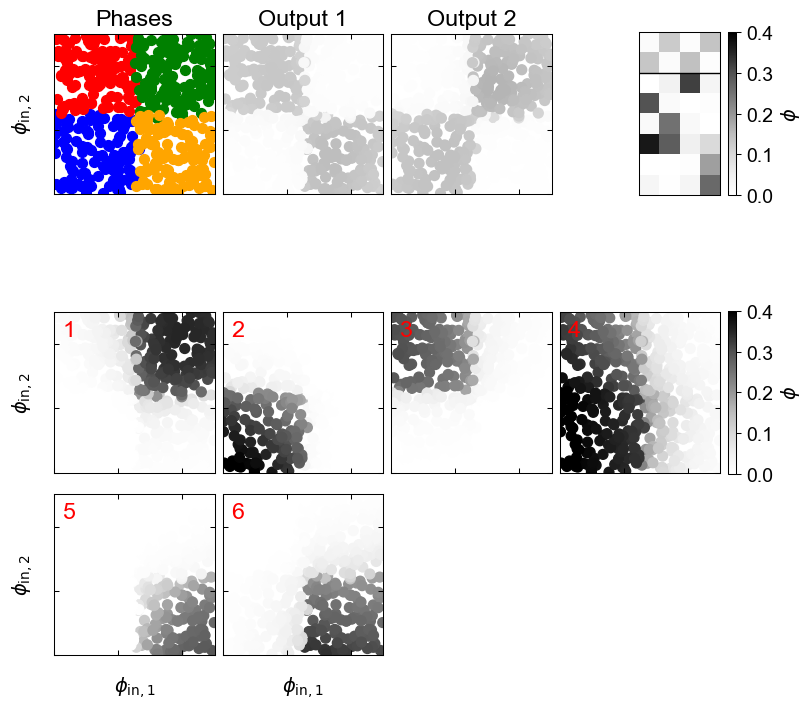

In [26]:
boundary_type = "xor"
n_hidden = 6

cmax = 0.4

data = np.load(figfol+f'{boundary_type}_data/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')
phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

fig, ax = plt.subplots(4, 4, figsize=(8,7), constrained_layout=True, height_ratios=[1,0.5,1,1])

for a in ax[0,:3]:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[2:].reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[-1]:
    a.set_xticks([0, 0.1, 0.2])
    a.set_xlabel(r'$\phi_{\text{in},1}$')

for a in (ax.T)[0]:
    a.set_yticks([0, 0.1, 0.2])
    a.set_ylabel(r'$\phi_{\text{in},2}$')

for a in ax[1]:
    a.set_visible(False)

colors = ['blue', 'red', 'green', 'orange']

for i in range(len(phases)):
    ax[0][0].scatter(*data[data_indices==i+1][:,:2].T, s=50, color=colors[i])
ax[0][0].set_title('Phases')

ax[0][1].scatter(*data[:,:2].T, c=data[:, 2], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][1].set_title('Output 1')

sc = ax[0][2].scatter(*data[:,:2].T, c=data[:, 3], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][2].set_title('Output 2')

phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

im=ax[0,3].imshow(phases.T, cmap='Grays', vmin=0, vmax=cmax)
ax[0,3].axhline(1.5, color='black')
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
plt.colorbar(im, label=r'$\phi$')

for i in range(2,3):
    for j in range(4):

        sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
        ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')
        if j==3:
            plt.colorbar(sc, label=r'$\phi$')

i=3
for j in range(2):

    sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
    ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')

ax[i][2].set_visible(False)
ax[i][3].set_visible(False)

fig_save = True
fig_name = f'{boundary_type}_breakdown'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-8-12/circle_breakdown


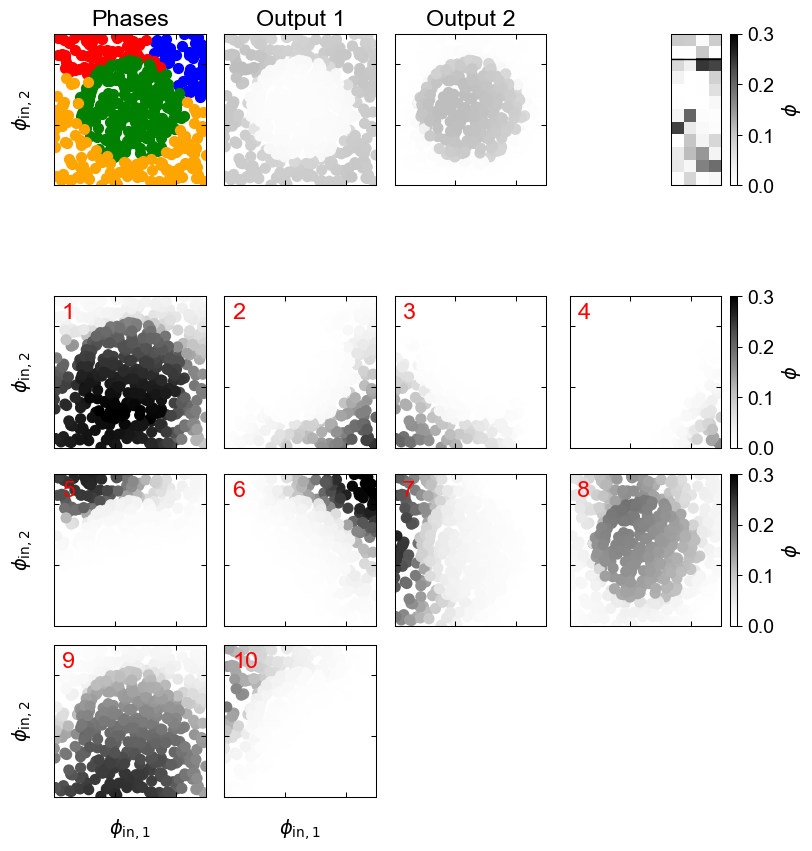

In [27]:
boundary_type = "circle"
n_hidden = 10

cmax = 0.3

data = np.load(figfol+f'{boundary_type}_data/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')
phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

fig, ax = plt.subplots(5, 4, figsize=(8,8.4), constrained_layout=True, height_ratios=[1,0.5,1,1,1])

for a in ax[0,:3]:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[2:].reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[-1]:
    a.set_xticks([0, 0.1, 0.2])
    a.set_xlabel(r'$\phi_{\text{in},1}$')

for a in (ax.T)[0]:
    a.set_yticks([0, 0.1, 0.2])
    a.set_ylabel(r'$\phi_{\text{in},2}$')

for a in ax[1]:
    a.set_visible(False)

colors = ['blue', 'red', 'green', 'orange']

for i in range(len(phases)):
    ax[0][0].scatter(*data[data_indices==i+1][:,:2].T, s=50, color=colors[i])
ax[0][0].set_title('Phases')

ax[0][1].scatter(*data[:,:2].T, c=data[:, 2], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][1].set_title('Output 1')

sc = ax[0][2].scatter(*data[:,:2].T, c=data[:, 3], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][2].set_title('Output 2')

phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

im=ax[0,3].imshow(phases.T, cmap='Grays', vmin=0, vmax=cmax)
ax[0,3].axhline(1.5, color='black')
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
plt.colorbar(im, label=r'$\phi$')

for i in range(2,4):
    for j in range(4):

        sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
        ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')
        if j==3:
            plt.colorbar(sc, label=r'$\phi$')

i=4
for j in range(2):

    sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
    ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')

ax[i][2].set_visible(False)
ax[i][3].set_visible(False)

fig_save = True
fig_name = f'{boundary_type}_breakdown'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-8-12/sine_breakdown


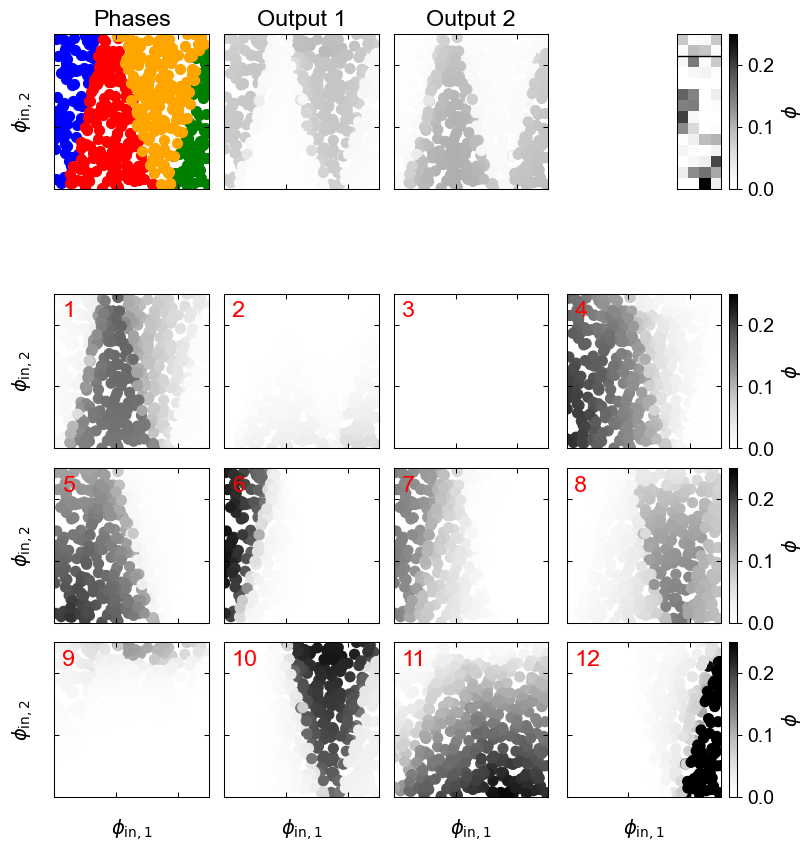

In [28]:
boundary_type = "sine"
n_hidden = 12

cmax = 0.25

data = np.load(figfol+f'{boundary_type}_data/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')
phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

fig, ax = plt.subplots(5, 4, figsize=(8,8.4), constrained_layout=True, height_ratios=[1,0.5,1,1,1])

for a in ax[0,:3]:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[2:].reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[-1]:
    a.set_xticks([0, 0.1, 0.2])
    a.set_xlabel(r'$\phi_{\text{in},1}$')

for a in (ax.T)[0]:
    a.set_yticks([0, 0.1, 0.2])
    a.set_ylabel(r'$\phi_{\text{in},2}$')

for a in ax[1]:
    a.set_visible(False)

colors = ['blue', 'red', 'green', 'orange']

for i in range(len(phases)):
    ax[0][0].scatter(*data[data_indices==i+1][:,:2].T, s=50, color=colors[i])
ax[0][0].set_title('Phases')

ax[0][1].scatter(*data[:,:2].T, c=data[:, 2], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][1].set_title('Output 1')

sc = ax[0][2].scatter(*data[:,:2].T, c=data[:, 3], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][2].set_title('Output 2')

phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

im=ax[0,3].imshow(phases.T, cmap='Grays', vmin=0, vmax=cmax)
ax[0,3].axhline(1.5, color='black')
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
plt.colorbar(im, label=r'$\phi$')

for i in range(2,5):
    for j in range(4):

        sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
        ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')
        if j==3:
            plt.colorbar(sc, label=r'$\phi$')

fig_save = True
fig_name = f'{boundary_type}_breakdown'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-8-12/checkerboard_breakdown


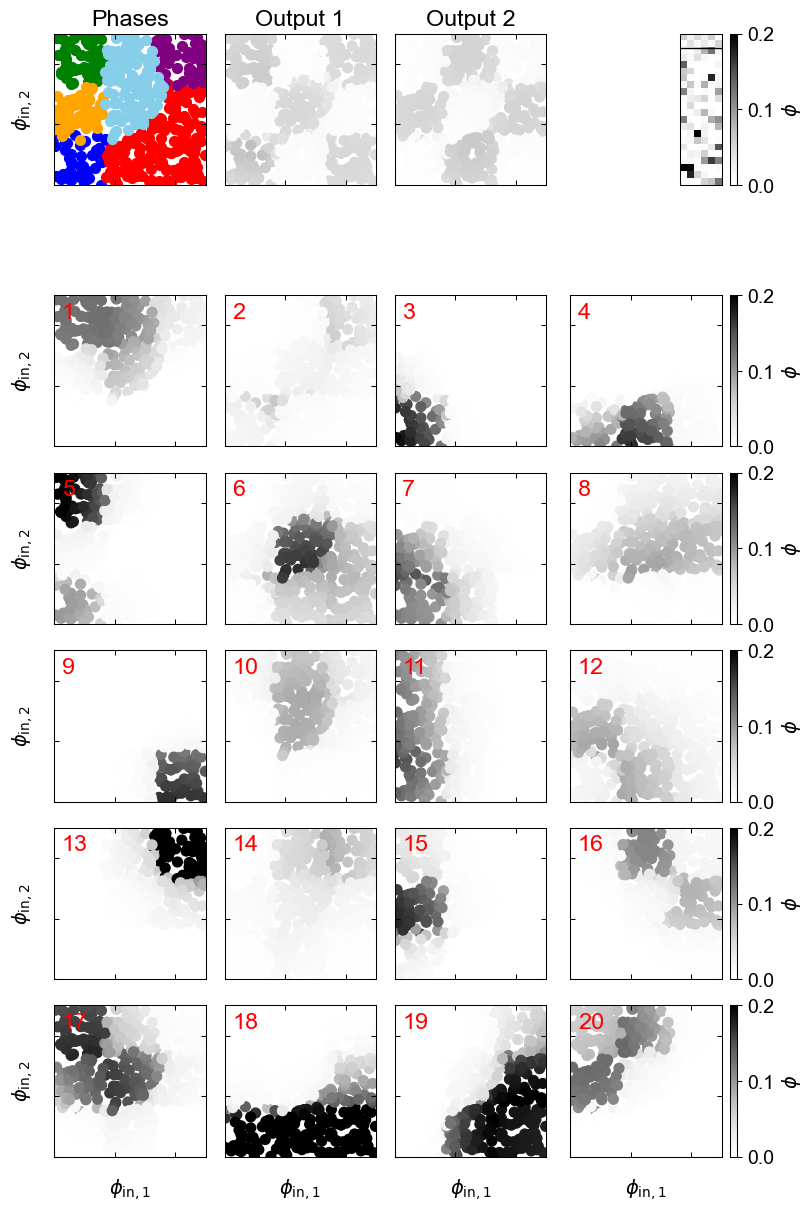

In [29]:
boundary_type = "checkerboard"
n_hidden = 20

cmax = 0.2

data = np.load(figfol+f'{boundary_type}_data/test_phis_final_{boundary_type}_{n_hidden}hidden.npy')
phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

fig, ax = plt.subplots(7, 4, figsize=(8,12), constrained_layout=True, height_ratios=[1,0.5,1,1,1,1,1])

for a in ax[0,:3]:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[2:].reshape(-1):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect(1)

for a in ax[-1]:
    a.set_xticks([0, 0.1, 0.2])
    a.set_xlabel(r'$\phi_{\text{in},1}$')

for a in (ax.T)[0]:
    a.set_yticks([0, 0.1, 0.2])
    a.set_ylabel(r'$\phi_{\text{in},2}$')

for a in ax[1]:
    a.set_visible(False)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'skyblue']

for i in range(len(phases)):
    ax[0][0].scatter(*data[data_indices==i+1][:,:2].T, s=50, color=colors[i])
ax[0][0].set_title('Phases')

ax[0][1].scatter(*data[:,:2].T, c=data[:, 2], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][1].set_title('Output 1')

sc = ax[0][2].scatter(*data[:,:2].T, c=data[:, 3], cmap='Grays', s=50, vmin=0, vmax=cmax)
ax[0][2].set_title('Output 2')

phases = np.load(figfol+f'{boundary_type}_data/cluster_densities_{boundary_type}_{n_hidden}hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

im=ax[0,3].imshow(phases.T, cmap='Grays', vmin=0, vmax=cmax)
ax[0,3].axhline(1.5, color='black')
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
plt.colorbar(im, label=r'$\phi$')

for i in range(2,7):
    for j in range(4):

        sc = ax[i][j].scatter(*data[:,:2].T, c=data[:, 4*(i-1) + j], cmap='Grays', s=50, vmin=0, vmax=cmax)
        ax[i][j].set_title(f'{1 + 4*(i-2)+j}', x = 0.05, y = 0.9, ha='left', va='top', color='red')
        if j==3:
            plt.colorbar(sc, label=r'$\phi$')

fig_save = True
fig_name = f'{boundary_type}_breakdown'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

# Supplementary Figure 13

In [30]:
figure = 'sup-fig-13'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-13/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-13/mnist_confusion_matrices


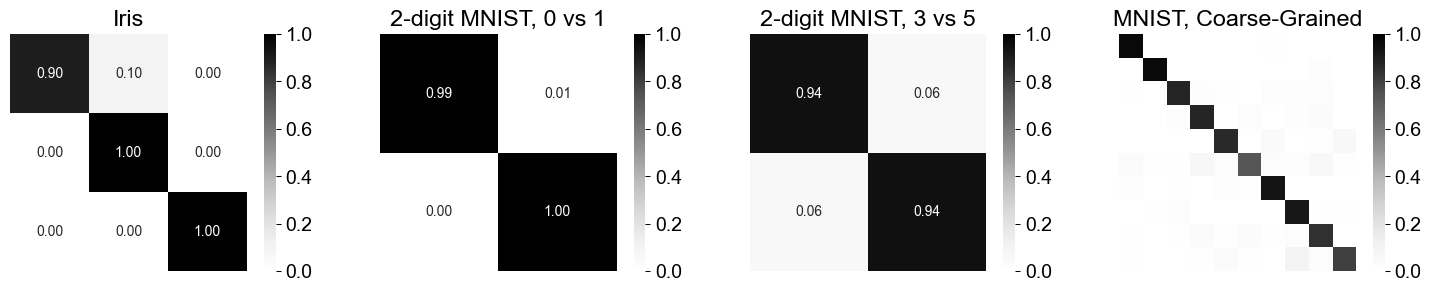

In [31]:
import seaborn as sn

fig, ax = plt.subplots(1,4,figsize=(15,3))

btypes = ['iris', 'digits_01', 'digits_35', 'digits']
titles = ['Iris', '2-digit MNIST, 0 vs 1', '2-digit MNIST, 3 vs 5', 'MNIST, Coarse-Grained']

#---------- iris ----------#

for i in range(len(btypes)):

    confusion_mat = np.load(figfol+f'{btypes[i]}_confusion-mat.npy')
    annot_bool = False if i==3 else True
    sn.heatmap(confusion_mat, annot=annot_bool, fmt=".2f", annot_kws={"size": 10}, cmap='Grays', ax=ax[i], vmin=0, vmax=1)

    ax[i].set_aspect(1)
    ax[i].set_axis_off()
    ax[i].set_title(titles[i])

fig.tight_layout()

fig_save = True
fig_name = f'mnist_confusion_matrices'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

## Supplementary Figure 14: Lattice Gas Validation

In [32]:
figure = 'sup-fig-14'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-14/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-14/Sc_lattice


/Users/azentner/anaconda3/envs/multiphase-env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/azentner/anaconda3/envs/multiphase-env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/azentner/anaconda3/envs/multiphase-env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


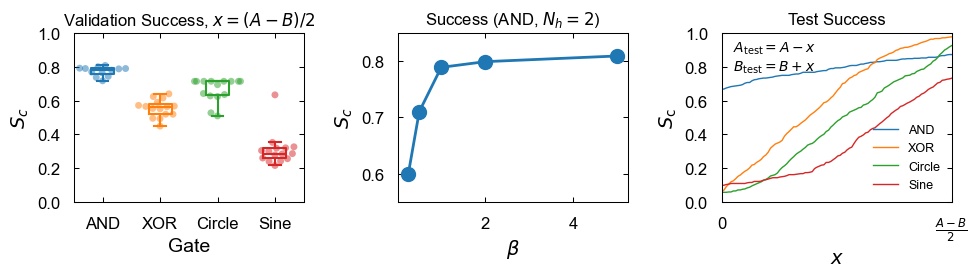

In [33]:
# Create a new figure
fig, ax = plt.subplots(1,3, figsize=(10,3))
for a in ax:
    make_nice_axis(a)

#--------------------#

data = np.load(figfol + '/success_scores_boxplot_15_seeds_beta_1_x_(0.425).npz')

# Prepare data for plotting
plot_data = []
for gate in ['and', 'xor', 'circle', 'sine']:
    values = data[f'{gate}']
    for value in values:
        plot_data.append({'Gate': gate, 'Sc Score': value})
df = pd.DataFrame(plot_data)

# Create the plots with proper hue parameter
sns.swarmplot(data=df, x='Gate', y='Sc Score', hue='Gate', ax=ax[0], palette="tab10", alpha=0.5, s=5, legend=False)
sns.boxplot(data=df, x='Gate', y='Sc Score', hue='Gate', ax=ax[0], palette="tab10", fill=False, linewidth=1.5, width=0.4, showfliers=False, legend=False)

# Set labels and limits
ax[0].set_title(r'Validation Success, $x=(A-B)/2$', fontsize=12)
ax[0].set_ylabel(r'$S_c$')
ax[0].set_ylim(0, 1)

# Customize x-axis labels
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['AND', 'XOR', 'Circle', 'Sine'])

#--------------------#

make_nice_axis(ax[1])
ax[1].set_ylim(0.55, 0.85)

#---------- Beta Sweep -----------#

data = np.load(figfol + '/beta_success_rates.npz')

ax[1].plot(data['betas'], data['success_rates'], 'o-', lw=2, ms=10)
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel(r'$S_c$')
ax[1].set_title(r'Success (AND, $N_h=2$)', fontsize=12)

#--------------------#

xvals = np.linspace(0,0.425,100)

data = np.load(figfol + '/Sc_vs_x_LG.npz')

gates = ['and', 'xor', 'circle', 'sine']
labels = ["AND", "XOR", "Circle", "Sine"]

# Prepare data for plotting
plot_data = []
for i in range(len(gates)):
    gate = gates[i]
    values = data[f'{gate}']
    ax[2].plot(xvals, values, label = labels[i])

# Set labels and limits

ax[2].set_xlim(0,xvals[-1])
ax[2].set_ylim(0, 1)
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$S_\text{c}$')
ax[2].set_xticks([0, 0.425])
ax[2].set_xticklabels([0,r'$\frac{A-B}{2}$'])
ax[2].set_title('Test Success', fontsize=12)
ax[2].text(s=r'$A_\text{test}=A-x$'+'\n'+r'$B_\text{test}=B+x$', x=0.02, y=0.75, fontsize=10, ha='left', va='bottom')

ax[2].legend(frameon=False, fontsize=9)

#--------------------#

plt.tight_layout()

fig_name = 'Sc_lattice'
if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-14/and_boundary


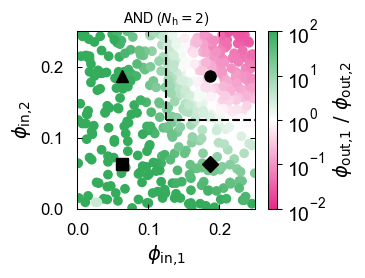

In [34]:
fig, ax = plt.subplots(1,1)
make_nice_axis(ax)

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

# 2) AND gate: (1)
filename = figfol + 'and_N_7_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax.scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])
ax.set_title(r'AND ($N_\text{h}=2$)', fontsize=10)

ax.axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax.axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)
ax.set_xlabel(r'$\phi_\text{in,1}$')
ax.set_ylabel(r'$\phi_\text{in,2}$')
ax.set_xlim(0,0.25)
ax.set_ylim(0,0.25)
ax.set_xticks([0,0.1,0.2])
ax.set_yticks([0,0.1,0.2])
ax.set_aspect(1)

ax.plot(0.0625, 0.0625, 's', color='black', markersize=8)#, markerfacecolor='lightsteelblue')
ax.plot(0.0625, 0.1875, '^', color='black', markersize=8)#, markerfacecolor='lightsteelblue')
ax.plot(0.1875, 0.1875, 'o', color='black', markersize=8)#, markerfacecolor='lightsteelblue')
ax.plot(0.1875, 0.0625, 'D', color='black', markersize=8)#, markerfacecolor='lightsteelblue')

fig.tight_layout()

fig_save = True
fig_name = 'and_boundary'
if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-14/and_free energy


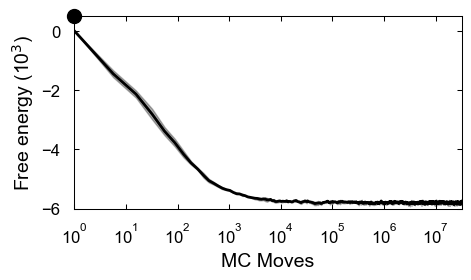

In [36]:
data = np.load(f"{figfol}/and_dynamics/and_N_7_free_energy_H-H.npz")
mean = data['free_energy_mean'] * 10**(-3)
std = data['free_energy_std'] * 10**(-3)
xpoints = np.load(figfol + '/and_dynamics/x_new_log_mapping.npy')

fig, ax = plt.subplots(1,1, figsize=(5,2.5))
make_nice_axis(ax)
ax.plot(xpoints, mean, lw=2, color='black')
ax.fill_between(xpoints, mean - std, mean + std, alpha=0.3, color='black')

ax.set_xticks(xpoints[::10])
ax.set_xscale('log')
ax.set_xlabel('MC Moves')
ax.set_ylabel('Free energy (10$^3$)')

ax.set_xlim(xpoints[0], xpoints[-1])
ax.set_ylim(-6,0.5)

ax.plot(xpoints[0], 0.5, 'o', color='black', markersize=10, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')

ax.xaxis.set_major_locator(LogLocator(base=10, numticks=9))
ax.xaxis.set_major_formatter(LogFormatterMathtext())

fig_save = True
fig_name = 'and_free energy'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-14/species_counts_AND_LG


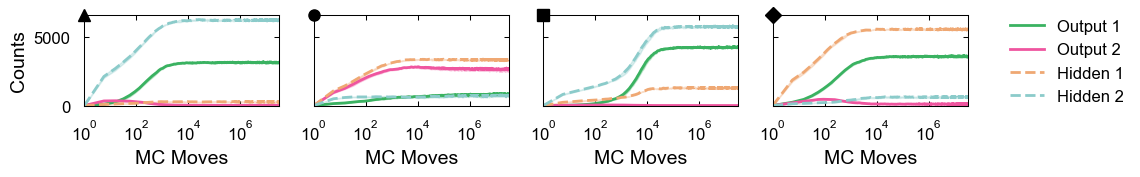

In [37]:
# Create a 2×2 figure
fig, ax = plt.subplots(1,4, figsize=(10, 2), sharex=True, sharey=True)

point_data = np.array([[0.0625,0.1875],[0.1875,0.1875],[0.0625,0.0625],[0.1875,0.0625]])
strings = ['(0.062,0.188)','(0.188,0.188)','(0.062,0.062)','(0.188,0.062)']

axes = ax.flatten()

xpoints = np.load(figfol + '/and_dynamics/x_new_log_mapping.npy')

# Loop over each label and corresponding Axes
for i in range(4):
    # Load the appropriate .npz file
    data = np.load(f"{figfol}/and_dynamics/and_N_7_species_counts_{strings[i]}.npz")#beta_2.0_freq_0.5_phi_{strings[i]}_results.npz")
    mean = data['species_counts_mean']
    std = data['species_counts_std']

    axis = axes[i]

    # Apply formatting
    make_nice_axis(axis)

    axis.plot(xpoints, mean[:, 3], lw=2, color=node_colors[0], label=f"Output 1")
    axis.plot(xpoints, mean[:, 4], lw=2, color=node_colors[1], label=f"Output 2")
    axis.plot(xpoints, mean[:, 5],'--', lw=2, color=node_colors[2], label=f"Hidden 1")
    axis.plot(xpoints, mean[:, 6], '--', lw=2, color=node_colors[3], label=f"Hidden 2")

    axis.fill_between(xpoints, mean[:, 3]-std[:,3], mean[:, 3]+std[:,3], alpha=0.3, color=node_colors[0])
    axis.fill_between(xpoints, mean[:, 4]-std[:,4], mean[:, 4]+std[:,4], alpha=0.3, color=node_colors[1])
    axis.fill_between(xpoints, mean[:, 5]-std[:,5], mean[:, 5]+std[:,5], alpha=0.3, color=node_colors[2])
    axis.fill_between(xpoints, mean[:, 6]-std[:,6], mean[:, 6]+std[:,6], alpha=0.3, color=node_colors[3])

    # Log scale for x‐axis
    axis.set_xscale('log')



    # Hide x‐tick labels on top row
    if not axis.get_subplotspec().is_last_row():
        axis.tick_params(labelbottom=False)
    else:
        # Only bottom row: add x‐axis label and log formatting
        axis.set_xlabel('MC Moves')
        axis.xaxis.set_major_locator(LogLocator(base=10, numticks=6))
        axis.xaxis.set_major_formatter(LogFormatterMathtext())

    # Hide y‐tick labels on right column
    if not axis.get_subplotspec().is_first_col():
        axis.tick_params(labelleft=False)
    else:
        # Only left column: add y‐axis label
        axis.set_ylabel('Counts')

# After plotting all subplots, set a common y‐limit across them
all_ymax = max([axis.get_ylim()[1] for axis in ax.flatten()])
for axis in ax.flatten():
    axis.set_xlim(xpoints[0], xpoints[-1])
    axis.set_ylim(0, all_ymax)

ax[2].plot(xpoints[0], all_ymax, 's', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')
ax[0].plot(xpoints[0], all_ymax, '^', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')
ax[3].plot(xpoints[0], all_ymax, 'D', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')
ax[1].plot(xpoints[0], all_ymax, 'o', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.15,0.92), frameon=False, fontsize=12)

fig.tight_layout()

# Save if desired
fig_save = True
fig_name = 'species_counts_AND_LG'
if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)

## Supplementary Figure 15: Lattice Gas Absolute Concentrations

In [38]:
figure = 'sup-fig-15'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/sup-fig-15/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-15/and_absolute-densities


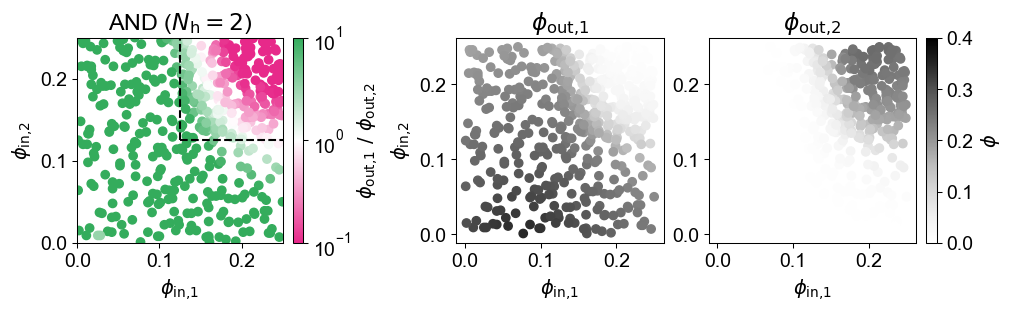

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='compressed')

# Use LogNorm for logarithmic color scale
scale = 1e-1
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

filename = figfol + 'and_N_7_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[0].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
cbar.set_ticks([1e-1, 1, 1e1])
ax[0].set_title(r'AND ($N_\text{h}=2$)')

ax[0].axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)


ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
#ax[-1].set_yticks([])

data = np.load(figfol + 'and_N_7_testdata_plot_beta_2_outputs.npz')

sc = ax[1].scatter(data['phi1'], data['phi2'], c=data['out1'], cmap='Grays', vmin=0, vmax=0.4)
ax[1].set_xlabel(r'$\phi_\text{in,1}$')
ax[1].set_title(r'$\phi_\text{out,1}$')

sc = ax[2].scatter(data['phi1'], data['phi2'], c=data['out2'], cmap='Grays', vmin=0, vmax=0.4)
ax[2].set_xlabel(r'$\phi_\text{in,1}$')
ax[2].set_title(r'$\phi_\text{out,2}$')

cbar = plt.colorbar(sc, label=r'$\phi$')
# Set custom tick labels
cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4])
#plt.tight_layout()
fig_save = True
fig_name = 'and_absolute-densities'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-15/xor_absolute-densities


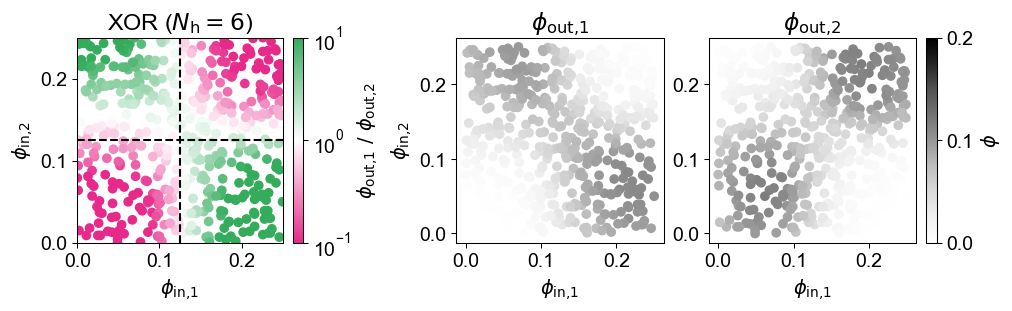

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='compressed')

# Use LogNorm for logarithmic color scale
scale = 1e-1
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

filename = figfol + 'xor_N_11_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[0].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
cbar.set_ticks([1e-1, 1, 1e1])
ax[0].set_title(r'XOR ($N_\text{h}=6$)')

ax[0].axhline(0.125, ls='--', color='black', lw=1.5)
ax[0].axvline(0.125, ls='--', color='black', lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)

ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
#ax[-1].set_yticks([])

data = np.load(figfol + 'xor_N_11_testdata_plot_beta_2_outputs.npz')

sc = ax[1].scatter(data['phi1'], data['phi2'], c=data['out1'], cmap='Grays', vmin=0, vmax=0.2)
ax[1].set_xlabel(r'$\phi_\text{in,1}$')
ax[1].set_title(r'$\phi_\text{out,1}$')

sc = ax[2].scatter(data['phi1'], data['phi2'], c=data['out2'], cmap='Grays', vmin=0, vmax=0.2)
ax[2].set_xlabel(r'$\phi_\text{in,1}$')
ax[2].set_title(r'$\phi_\text{out,2}$')

cbar = plt.colorbar(sc, label=r'$\phi$')
# Set custom tick labels
cbar.set_ticks([0, 0.1, 0.2])
#plt.tight_layout()
fig_save = True
fig_name = 'xor_absolute-densities'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='compressed')

# Use LogNorm for logarithmic color scale
scale = 1e-1
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

filename = figfol + 'circle_N_15_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[0].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
cbar.set_ticks([1e-1, 1, 1e1])
ax[0].set_title(r'Circle ($N_\text{h}=10$)')

r = 0.25/3
xvals = 0.125 + np.linspace(-r, r, 100)
ax[0].plot(xvals, 0.125 + np.sqrt(r**2 - (xvals-0.125)**2), ls='--', color='black', lw=1.5)
ax[0].plot(xvals, 0.125 - np.sqrt(r**2 - (xvals-0.125)**2), ls='--', color='black', lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)


ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
#ax[-1].set_yticks([])

data = np.load(figfol + 'circle_N_15_testdata_plot_beta_2_outputs.npz')

sc = ax[1].scatter(data['phi1'], data['phi2'], c=data['out1'], cmap='Grays', vmin=0, vmax=0.2)
ax[1].set_xlabel(r'$\phi_\text{in,1}$')
ax[1].set_title(r'$\phi_\text{out,1}$')

sc = ax[2].scatter(data['phi1'], data['phi2'], c=data['out2'], cmap='Grays', vmin=0, vmax=0.2)
ax[2].set_xlabel(r'$\phi_\text{in,1}$')
ax[2].set_title(r'$\phi_\text{out,2}$')

cbar = plt.colorbar(sc, label=r'$\phi$')
# Set custom tick labels
cbar.set_ticks([0, 0.1, 0.2])
#plt.tight_layout()
fig_save = True
fig_name = 'circle_absolute-densities'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//sup-fig-15/circle_absolute-densities


/Users/azentner/Desktop/Research/Harvard/Brenner/condensate-computation/Figures/Output/20250908//sup-fig-15/sine_absolute-densities


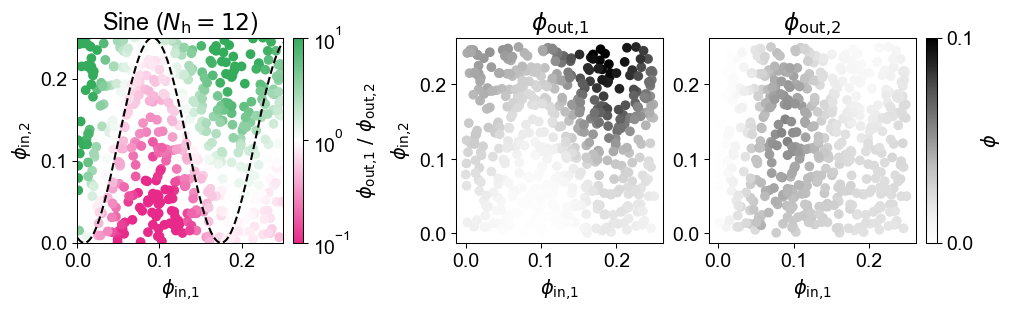

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='compressed')

# Use LogNorm for logarithmic color scale
scale = 1e-1
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

filename = figfol + 'sine_N_17_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[0].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
cbar.set_ticks([1e-1, 1, 1e1])
ax[0].set_title(r'Sine ($N_\text{h}=12$)')

max_input = 0.25
xvals = np.linspace(0, max_input, 500)
sine_boundary = (max_input / 2) * (1 + np.sin((3 / 2) * 2 * np.pi * (xvals / max_input - 0.2)))
ax[0].plot(xvals, sine_boundary, 'k--', lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)


ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
#ax[-1].set_yticks([])

data = np.load(figfol + 'sine_N_17_testdata_plot_beta_2_outputs.npz')

sc = ax[1].scatter(data['phi1'], data['phi2'], c=data['out1'], cmap='Grays', vmin=0, vmax=0.1)
ax[1].set_xlabel(r'$\phi_\text{in,1}$')
ax[1].set_title(r'$\phi_\text{out,1}$')

sc = ax[2].scatter(data['phi1'], data['phi2'], c=data['out2'], cmap='Grays', vmin=0, vmax=0.1)
ax[2].set_xlabel(r'$\phi_\text{in,1}$')
ax[2].set_title(r'$\phi_\text{out,2}$')

cbar = plt.colorbar(sc, label=r'$\phi$')
# Set custom tick labels
cbar.set_ticks([0, 0.1])
#plt.tight_layout()
fig_save = True
fig_name = 'sine_absolute-densities'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()